### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

----------------------

## Import data

### Brief Explanation of the dataset's abbreviated variables
Attributes related with Eating Habits: <br>
FAVC: Frequent consumption of high caloric food <br>
FCVC: Frequency of consumption of vegetables <br>
NCP: Number of main meals<br>
CAEC: Consumption of food between meals<br>
CH2O: Consumption of water daily<br>
CALC: Consumption of alcohol<br>

Class variable NObeyesdad was created based on Equation (Mass Body Index = Weight/height*height) with the values of: <br> Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, 

In [2]:
obesity_data = pd.read_csv("datasets/ObesityDataSet_raw_and_data_sinthetic.csv")
pd.concat([obesity_data.head(), obesity_data.tail()])

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#check for missing data
obesity_data.isnull().any()

-----------
## Mini EDA on the data

In [ ]:
sb.countplot(x='NObeyesdad', data=obesity_data)
plt.xticks(rotation=45, ha='right')

In [ ]:
sb.countplot(x='NObeyesdad', hue='FAVC', data=obesity_data)
plt.xticks(rotation=45, ha='right')

In [ ]:
sb.countplot(x='NObeyesdad', hue='CAEC', data=obesity_data)
plt.xticks(rotation=45, ha='right')

In [ ]:
sb.countplot(x='NObeyesdad', hue='CALC', data=obesity_data)
plt.xticks(rotation=45, ha='right')

In [ ]:
sb.countplot(x='NObeyesdad', hue=obesity_data['FCVC'].apply(np.ceil), data=obesity_data)
plt.xticks(rotation=45, ha='right')

In [ ]:
sb.countplot(x='NObeyesdad', hue=obesity_data['NCP'].apply(np.ceil), data=obesity_data)
plt.xticks(rotation=45, ha='right')

In [ ]:
sb.countplot(x='NObeyesdad', hue=obesity_data['CH2O'].apply(np.ceil), data=obesity_data)
plt.xticks(rotation=45, ha='right')

## Cleaning the data

In [3]:
focusObesity_data = obesity_data[['FAVC', 'FCVC', 'NCP','CAEC','CH2O', 'CALC']].copy()

In [4]:
#view cleaned data
focusObesity_data

,FAVC,FCVC,NCP,CAEC,CH2O,CALC
0,no,2.0,3.0,Sometimes,2.000000,no
1,no,3.0,3.0,Sometimes,3.000000,Sometimes
2,no,2.0,3.0,Sometimes,2.000000,Frequently
3,no,3.0,3.0,Sometimes,2.000000,Frequently
4,no,2.0,1.0,Sometimes,2.000000,Sometimes
...,...,...,...,...,...,...
2106,yes,3.0,3.0,Sometimes,1.728139,Sometimes
2107,yes,3.0,3.0,Sometimes,2.005130,Sometimes
2108,yes,3.0,3.0,Sometimes,2.054193,Sometimes
2109,yes,3.0,3.0,Sometimes,2.852339,Sometimes


### Changing categorical data into dummies
As ML Algorithm cannot work directly with categorical data.

Dummy Variables are binary variables.

In Logistic Regression, dummy variables are useful as they allow us to compare the effect of each category on the outcome variable while controlling for the effects of other variables in the model.omp

In [6]:
#Reusable function 
def get_dummies_and_drop(df, column):
    dummies = pd.get_dummies(df, columns=[column], drop_first=True)
    df.drop(column, axis=1, inplace=True)
    df = pd.concat([dummies], axis=1)
    return df

In [7]:
focusObesity_data = get_dummies_and_drop(focusObesity_data, 'FAVC')


In [8]:
focusObesity_data = get_dummies_and_drop(focusObesity_data, 'CAEC')

In [9]:
focusObesity_data = get_dummies_and_drop(focusObesity_data, 'CALC')

In [10]:
#display the current df
focusObesity_data

,FCVC,NCP,CH2O,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,2.0,3.0,2.000000,0,0,1,0,0,0,1
1,3.0,3.0,3.000000,0,0,1,0,0,1,0
2,2.0,3.0,2.000000,0,0,1,0,1,0,0
3,3.0,3.0,2.000000,0,0,1,0,1,0,0
4,2.0,1.0,2.000000,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2106,3.0,3.0,1.728139,1,0,1,0,0,1,0
2107,3.0,3.0,2.005130,1,0,1,0,0,1,0
2108,3.0,3.0,2.054193,1,0,1,0,0,1,0
2109,3.0,3.0,2.852339,1,0,1,0,0,1,0


--------------
### Splitting Data into Predictor and Response Variables
Splitting data into independent(X) [predictor] and dependent(Y) [response] variables

In [13]:
X = focusObesity_data
y = obesity_data.loc[:,'NObeyesdad'] # 

#### Feature Scaling
To normalize the range of independent variables to enable it to be in the same range. 

With the current dataset (which is a large dataset), scaling will help to improve the performance of the model

In [14]:

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.7850187 ,  0.40415272, -0.01307326, ..., -0.18519426,
        -1.40472041,  1.5177613 ],
       [ 1.08834176,  0.40415272,  1.61875854, ..., -0.18519426,
         0.71188543, -0.65886513],
       [-0.7850187 ,  0.40415272, -0.01307326, ...,  5.39973544,
        -1.40472041, -0.65886513],
       ...,
       [ 1.08834176,  0.40415272,  0.0753606 , ..., -0.18519426,
         0.71188543, -0.65886513],
       [ 1.08834176,  0.40415272,  1.37780063, ..., -0.18519426,
         0.71188543, -0.65886513],
       [ 1.08834176,  0.40415272,  1.39603472, ..., -0.18519426,
         0.71188543, -0.65886513]])

#### Splitting dataset into Train and Test Sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Check the sample sizes
print("Train Set :", "X:",X_train.shape, "y:", y_train.shape)
print("Test Set  :", "X:", X_test.shape, "y:", y_test.shape)

Train Set : X: (1477, 10) y: (1477,)
Test Set  : X: (634, 10) y: (634,)


----------
### Logistic Regression 

In [16]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
553,Insufficient_Weight,Obesity_Type_II
331,Normal_Weight,Obesity_Type_I
241,Overweight_Level_I,Obesity_Type_II
1957,Obesity_Type_III,Obesity_Type_III
1691,Obesity_Type_II,Obesity_Type_II
...,...,...
1012,Overweight_Level_II,Overweight_Level_II
340,Normal_Weight,Obesity_Type_II
2005,Obesity_Type_III,Obesity_Type_III
1671,Obesity_Type_II,Obesity_Type_II


In [19]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[35, 11, 20, 14,  7,  3,  2],
       [21, 17, 12, 12,  3,  2, 10],
       [ 1,  6, 66, 25,  9,  2,  5],
       [ 0,  2, 24, 52,  7,  0,  0],
       [ 0,  0,  0,  0, 91,  0,  1],
       [ 5,  6, 21, 28,  5, 15,  9],
       [ 4,  3, 45,  9,  1,  3, 20]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

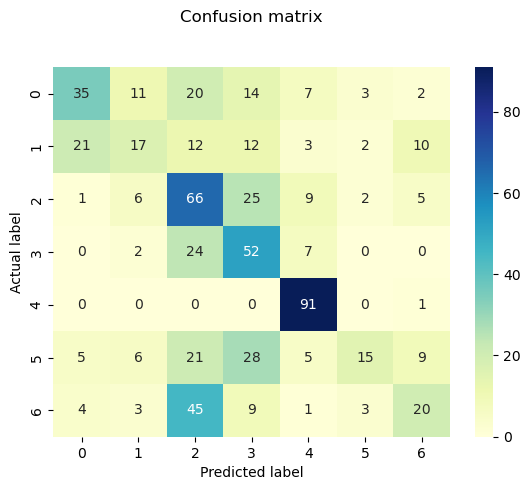

In [20]:
sb.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
accuracy_score(y_test,y_pred)

0.4668769716088328

An accuracy score of 0.46687 means that the model is able to predict the outcome correctly only 46.69% of the time. In other words, the model is not performing well and needs improvement. It could be due to various reasons such as insufficient data, inappropriate feature selection, or lack of complexity in the model.

-----------
### Enhancing Model Performance: Insights and Recommendations

In [ ]:
focusObesity_data_unexplored = obesity_data.copy()

In [ ]:
focusObesity_data_unexplored.drop('NObeyesdad', axis=1, inplace=True)

In [ ]:
focusObesity_data_unexplored.info()

In [ ]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'Gender')


In [ ]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'family_history_with_overweight')


In [ ]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'FAVC')


In [ ]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'CAEC')

In [ ]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'SMOKE')

In [ ]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'SCC')

In [ ]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'CALC')

In [ ]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'MTRANS')

In [ ]:
focusObesity_data_unexplored

In [ ]:
X = focusObesity_data_unexplored
y = obesity_data.loc[:,'NObeyesdad'] # 

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

In [ ]:
sb.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
accuracy_score(y_test,y_pred)

------------
TESTING IN PROGRESS:


THIS IS THE ARCHIVE CODES

In [ ]:
caec = pd.get_dummies(focusObesity_data, columns=['CAEC'], drop_first=True)
focusObesity_data.drop('CAEC',axis=1,inplace=True)
focusObesity_data = pd.concat([caec], axis=1)

In [ ]:
calc = pd.get_dummies(focusObesity_data, columns=['CALC'], drop_first=True)
focusObesity_data.drop('CALC',axis=1,inplace=True)
focusObesity_data = pd.concat([calc], axis=1)

In [ ]:
#nobeyesdad = pd.get_dummies(focusObesity_data, columns=['NObeyesdad'], drop_first=True)
#focusObesity_data.drop('NObeyesdad',axis=1,inplace=True)
#focusObesity_data = pd.concat([nobeyesdad], axis=1)

In [ ]:
traindata = focusObesity_data.sample(frac=1, random_state =42)
n = traindata.shape[0]
train_size = int(n * 0.8)
train_data = traindata.iloc[:train_size]
test_data = traindata.iloc[train_size:]

In [ ]:
#X = focusObesity_data.loc[:, ['FCVC', 'NCP','CH2O', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no']] #
#y = obesity_data.loc[:,'NObeyesdad'] # 

Train datasets:

In [ ]:
X_train = train_data.loc[:, ['FCVC', 'NCP','CH2O', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no']] #
y_train = train_data.loc[:,'NObeyesdad'] # 
#y_train = train_data.loc[:, ['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I','NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']] 


Test datasets:

In [ ]:
X_test = test_data.loc[:, ['FCVC', 'NCP','CH2O', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no']] #
y_test = test_data.loc[:,'NObeyesdad'] #
#y_test = test_data.loc[:, ['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I','NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']] 


In [ ]:
# Check the sample sizes
print("Train Set :", "X:",X_train.shape, "y:", y_train.shape)
print("Test Set  :", "X:", X_test.shape, "y:", y_test.shape)


In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)